# **Main code**

In [2]:
#Instalación de librerias extra
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd 
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
import os
from datetime import datetime
from astropy.timeseries import LombScargle
from scipy.signal import periodogram
from astropy.time import Time
from astropy import units as u



In [4]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s drive/MyDrive/Tesis-maestria-Nicolas-Santiago-Jorge-GoSA-UdeA/Datasets/Mars_Express ME_data

Mounted at /content/drive


In [5]:
'''
Verificar directorio del archivo
que se carga en el bloque anterior
'''
!ls drive/MyDrive/Tesis-maestria-Nicolas-Santiago-Jorge-GoSA-UdeA/Datasets/Mars_Express

all_data_ME_H2O.csv	    H2O_MARS_CONC13.csv  H2O_MARS_CONC3.csv
all_data_ME_H2O.xlsx	    H2O_MARS_CONC14.csv  H2O_MARS_CONC4.csv
code.txt		    H2O_MARS_CONC15.csv  H2O_MARS_CONC5.csv
Earth_data_105km.xlsx	    H2O_MARS_CONC16.csv  H2O_MARS_CONC6.csv
H2O_data_ME_ordenado.ipynb  H2O_MARS_CONC17.csv  H2O_MARS_CONC7.csv
H2O_Mars_all_files.ipynb    H2O_MARS_CONC18.csv  H2O_MARS_CONC8.csv
H2O_MARS_CONC10.csv	    H2O_MARS_CONC19.csv  H2O_MARS_CONC9.csv
H2O_MARS_CONC11.csv	    H2O_MARS_CONC1.csv	 Mars_Express
H2O_MARS_CONC12.csv	    H2O_MARS_CONC2.csv	 ME_H2O_region1.ipynb


In [6]:
#Carga de datos procesados y sintetizados a formato .xlsx

df_earth_105 = pd.read_excel('ME_data/Earth_data_105km.xlsx')
H2O_ME=pd.read_excel('ME_data/all_data_ME_H2O.xlsx')

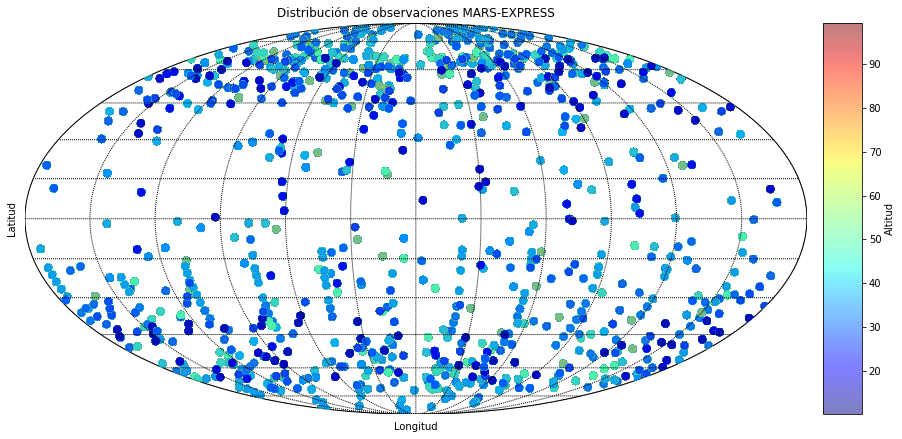

In [7]:
'''Visualización de distribución de
observaciones en proyección geográfica
tipo moll'''
from mpl_toolkits.basemap import Basemap as Map
from matplotlib import cm

plt.figure(figsize=(15,15))

m=Map(projection="moll", resolution='l', lon_0=0)
parallels = np.arange(-90.,90,15.)
m.drawparallels(parallels)
meridians = np.arange(-180.,180.,30.)
m.drawmeridians(meridians)
x, y = m(H2O_ME['LONGITUD_INTERCEPT'].values, H2O_ME['LATITUD_INTERCEPT'].values)

sc = m.scatter(x,y,50,c=H2O_ME['ALTITUD'].values, cmap=cm.jet, alpha=0.5, )

cbar = m.colorbar(sc)
cbar.set_label('Altitud')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de observaciones MARS-EXPRESS')
plt.grid()
plt.show()

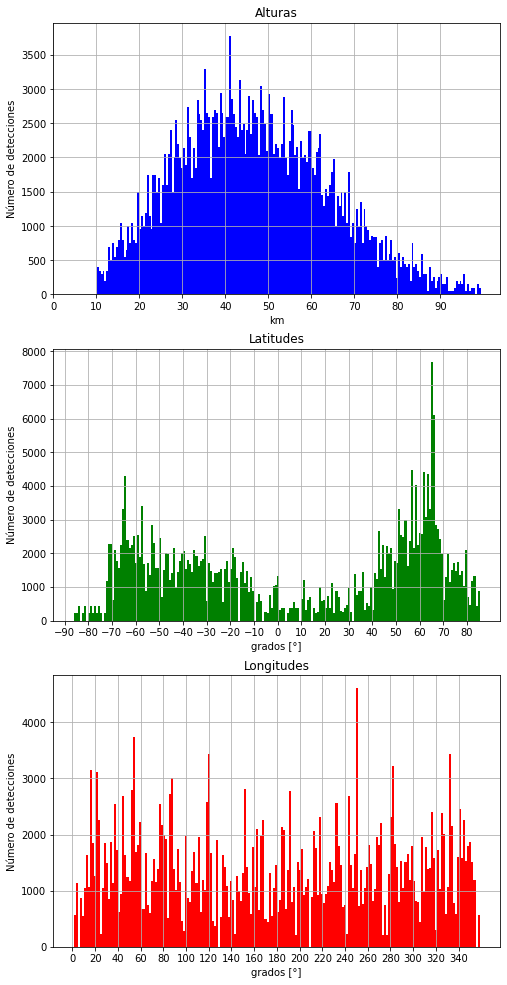

In [8]:
'''Visualización de distribución de
observaciones por latitud, longitud
y altura en histogramas'''

plt.figure(figsize=(8,17))

plt.subplot(311)
plt.hist(H2O_ME['ALTITUD'], bins=200, color='blue');
plt.title('Alturas')
plt.xlabel('km')
plt.ylabel('Número de detecciones')
plt.xticks(np.arange(0, 100, step=10))
plt.grid()

plt.subplot(312)
plt.hist(H2O_ME['LATITUD_INTERCEPT'], bins=200, color='green');
plt.title('Latitudes')
plt.xlabel('grados [°]')
plt.ylabel('Número de detecciones')
plt.xticks(np.arange(-90, 90, step=10))
plt.grid()

plt.subplot(313)
plt.hist(H2O_ME['LONGITUD_INTERCEPT'], bins=200, color='red');
plt.title('Longitudes')
plt.xlabel('grados [°]')
plt.ylabel('Número de detecciones')
plt.xticks(np.arange(0, 360, step=20))
plt.grid()


# **Análisis en la región de interes**

## Organización espacial de las observaciones

In [25]:
#Generalización de regiones: ENTRADAS

lat_i, lat_s, long_i, long_s = 60, 80, 280, 300  
region_1 = pd.DataFrame()

for cr in range(len(H2O_ME)):
  if float(H2O_ME['LATITUD_INTERCEPT'][cr:cr+1])>lat_i and float(H2O_ME['LATITUD_INTERCEPT'][cr:cr+1])<=lat_s:
   if float(H2O_ME['LONGITUD_INTERCEPT'][cr:cr+1])>=long_i and float(H2O_ME['LONGITUD_INTERCEPT'][cr:cr+1])<=long_s:
     temp =  H2O_ME[cr:cr+1]
     region_1=region_1.append(temp)

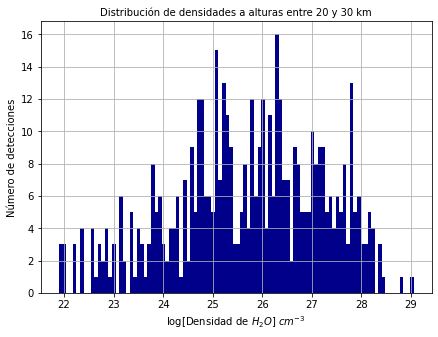

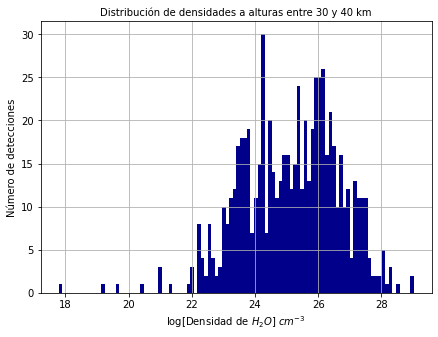

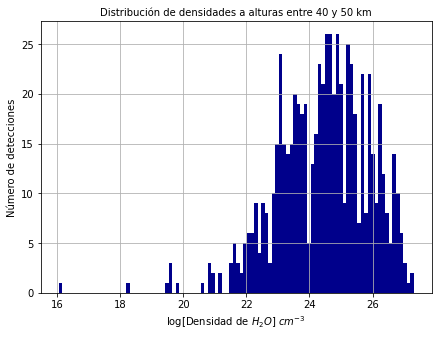

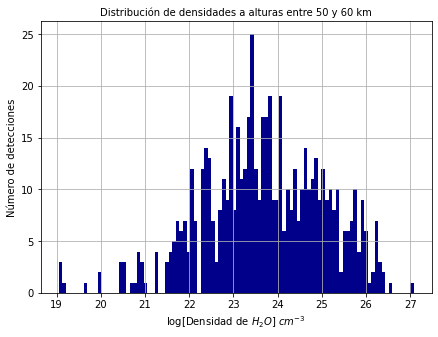

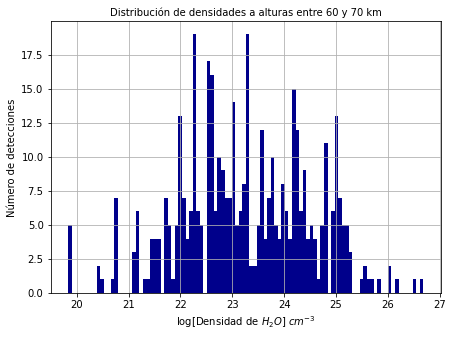

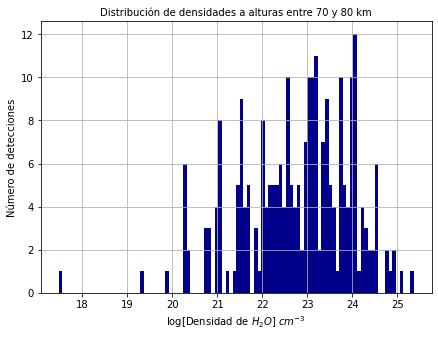

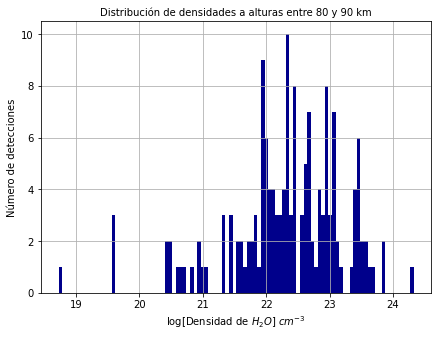

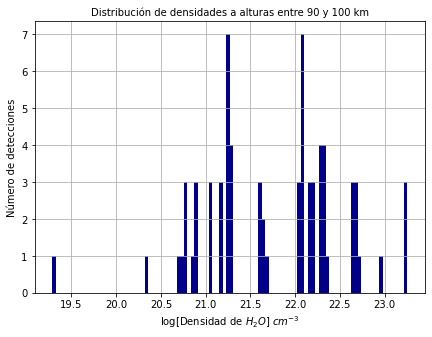

In [26]:
#Configuración de alturas para la región dada 

alturas1 = []

h_ME = np.arange(20,110,10)  #km

for h in range(len(h_ME)-1):
  H_temp = region_1.loc[(region_1['ALTITUD']>=h_ME[h]) & (region_1['ALTITUD']<=h_ME[h+1])]
  alturas1.append(H_temp)

#Graficación de histogramas para los diferentes rangos de altura escogidos. 

for i in range(len(alturas1)):  
  plt.figure(figsize=(7,5))
  plt.hist(np.log(alturas1[i]['H2O_CONCENTRATION']), bins=100, color='darkblue');
  plt.title(f'Distribución de densidades a alturas entre {h_ME[i]} y {h_ME[i+1]} km', size=10)
  plt.xlabel(r'log[Densidad de $H_2O]$ $cm^{-3}$', size=10)
  plt.ylabel('Número de detecciones', size=10)
  plt.grid()  

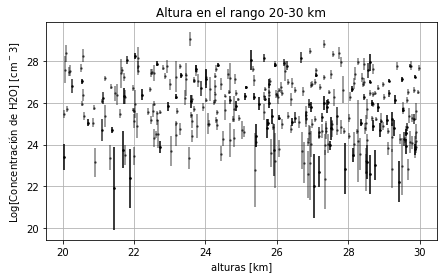

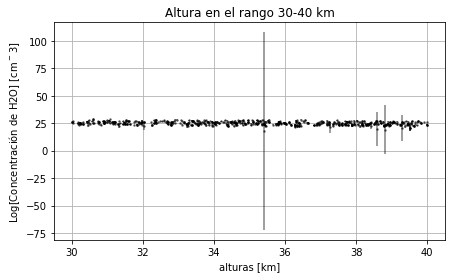

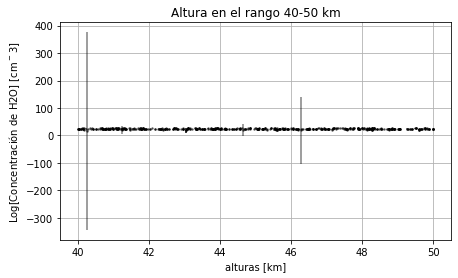

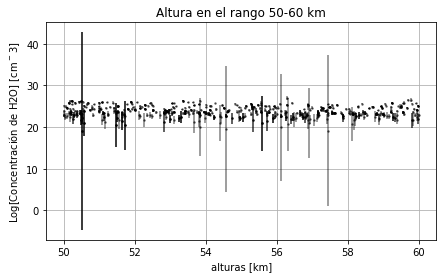

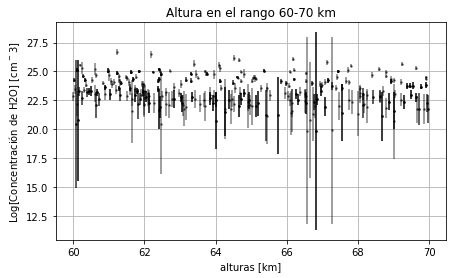

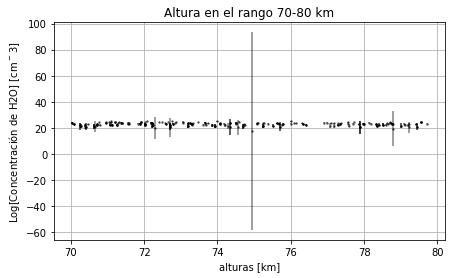

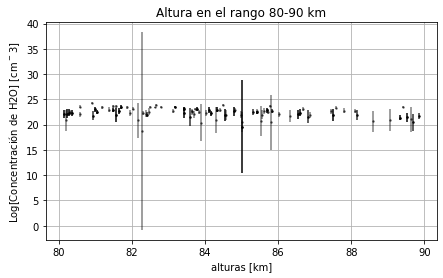

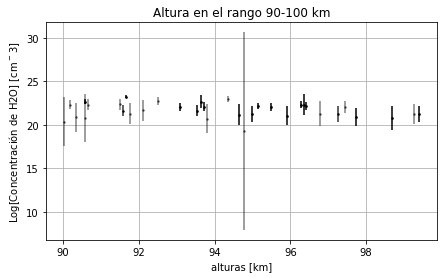

In [27]:
for hg in range(len(alturas1)):
  plt.figure(figsize=(7,4))
  plt.errorbar(alturas1[hg]['ALTITUD'], np.log(alturas1[hg]['H2O_CONCENTRATION']),
               (alturas1[hg]['ERR_H2O_CONCENTRATION']/alturas1[hg]['H2O_CONCENTRATION']),
               fmt='.k', markersize=3, alpha=0.5)
  plt.title(f'Altura en el rango {h_ME[hg]}-{h_ME[hg+1]} km')
  plt.xlabel('alturas [km]')
  plt.ylabel('Log[Concentración de H2O] [cm$^-3$]')
  plt.grid()

## Distribución temporal de las observaciones (interpretadas como señales)

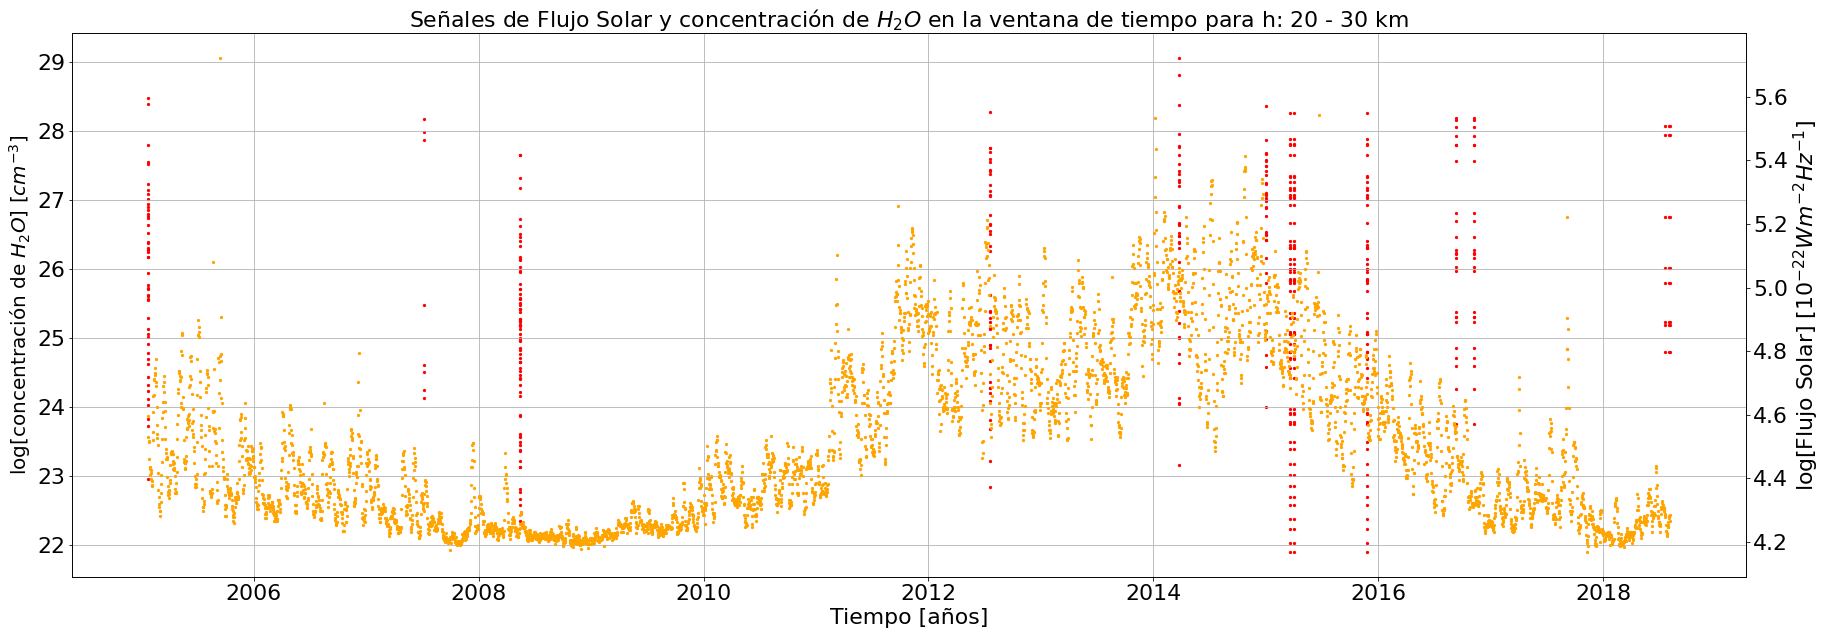

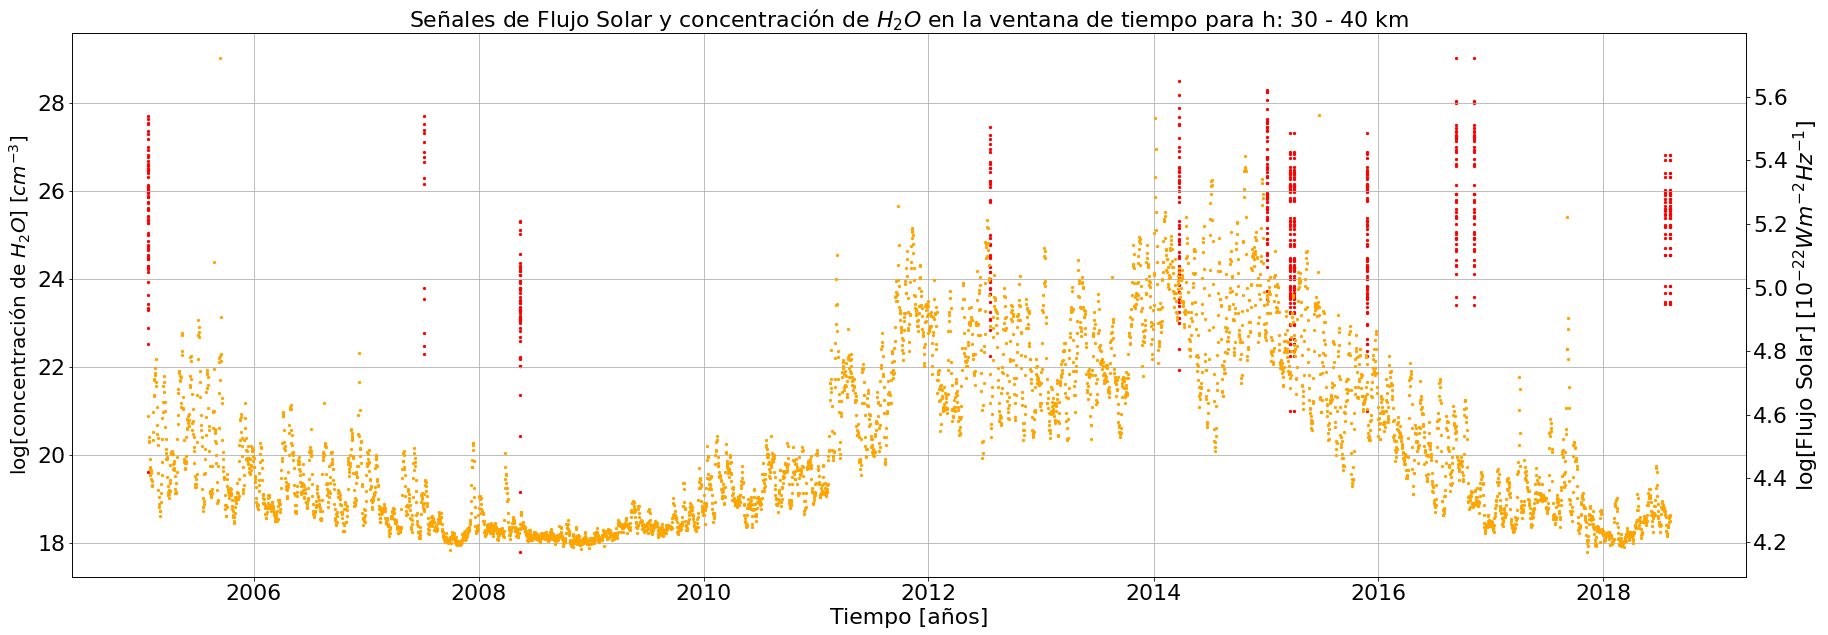

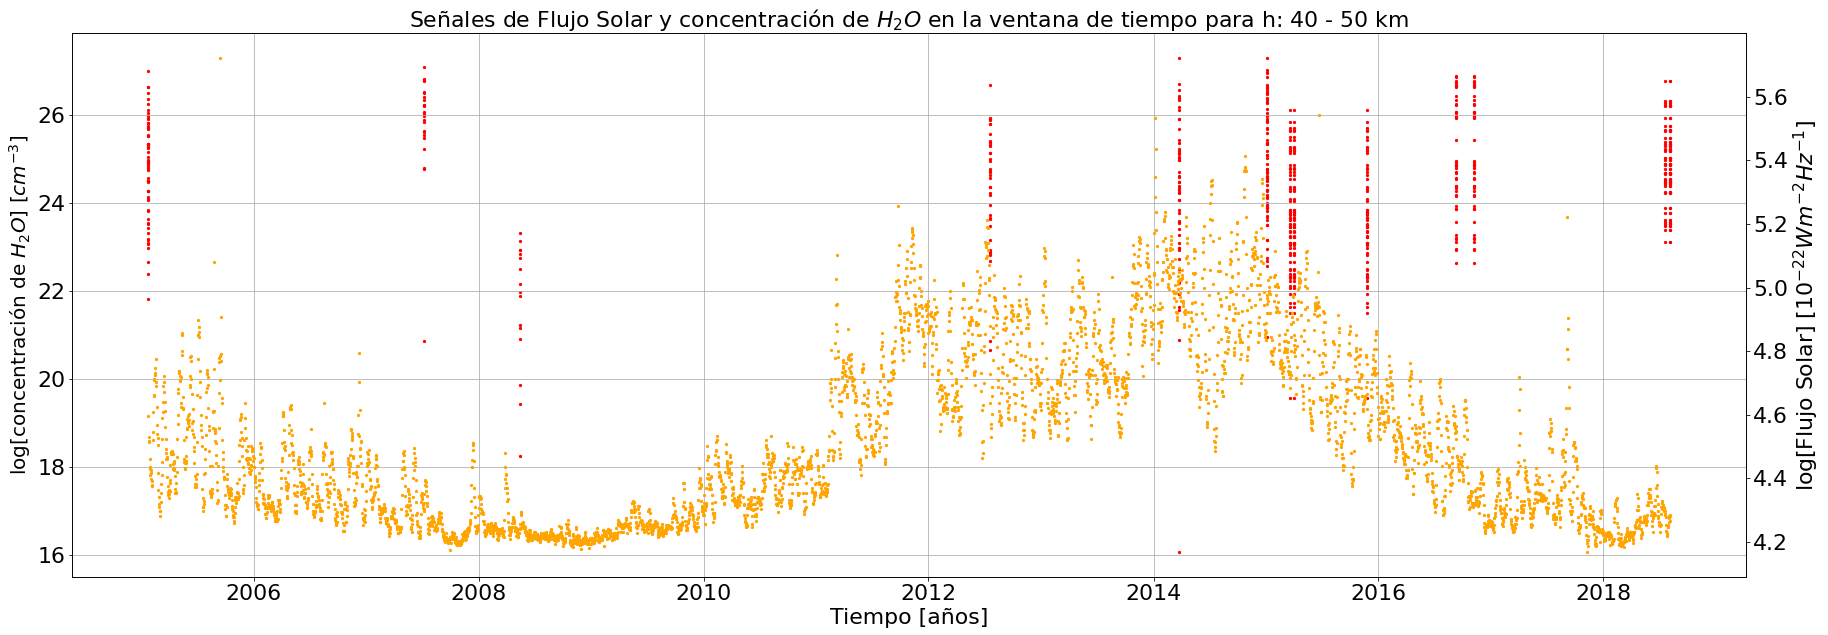

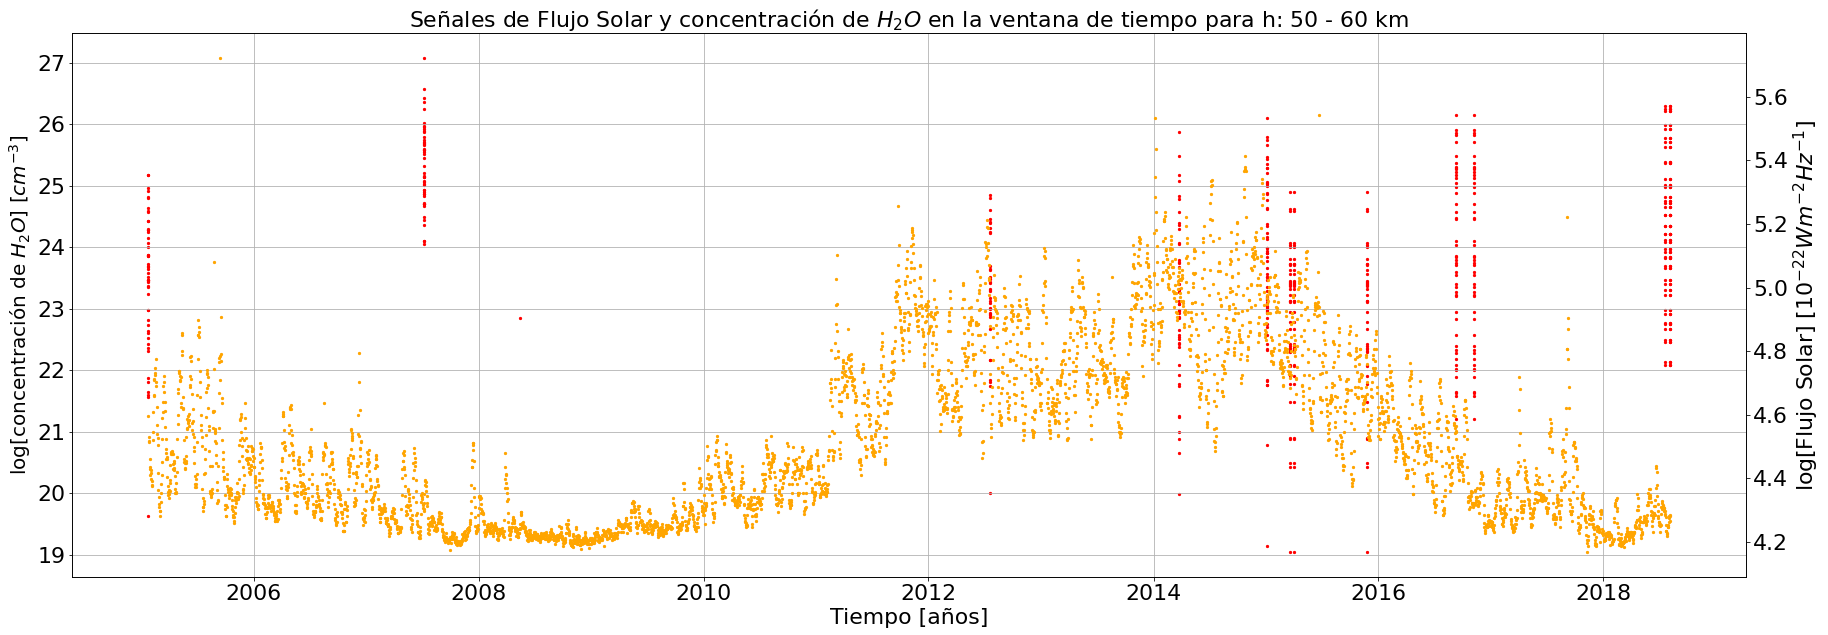

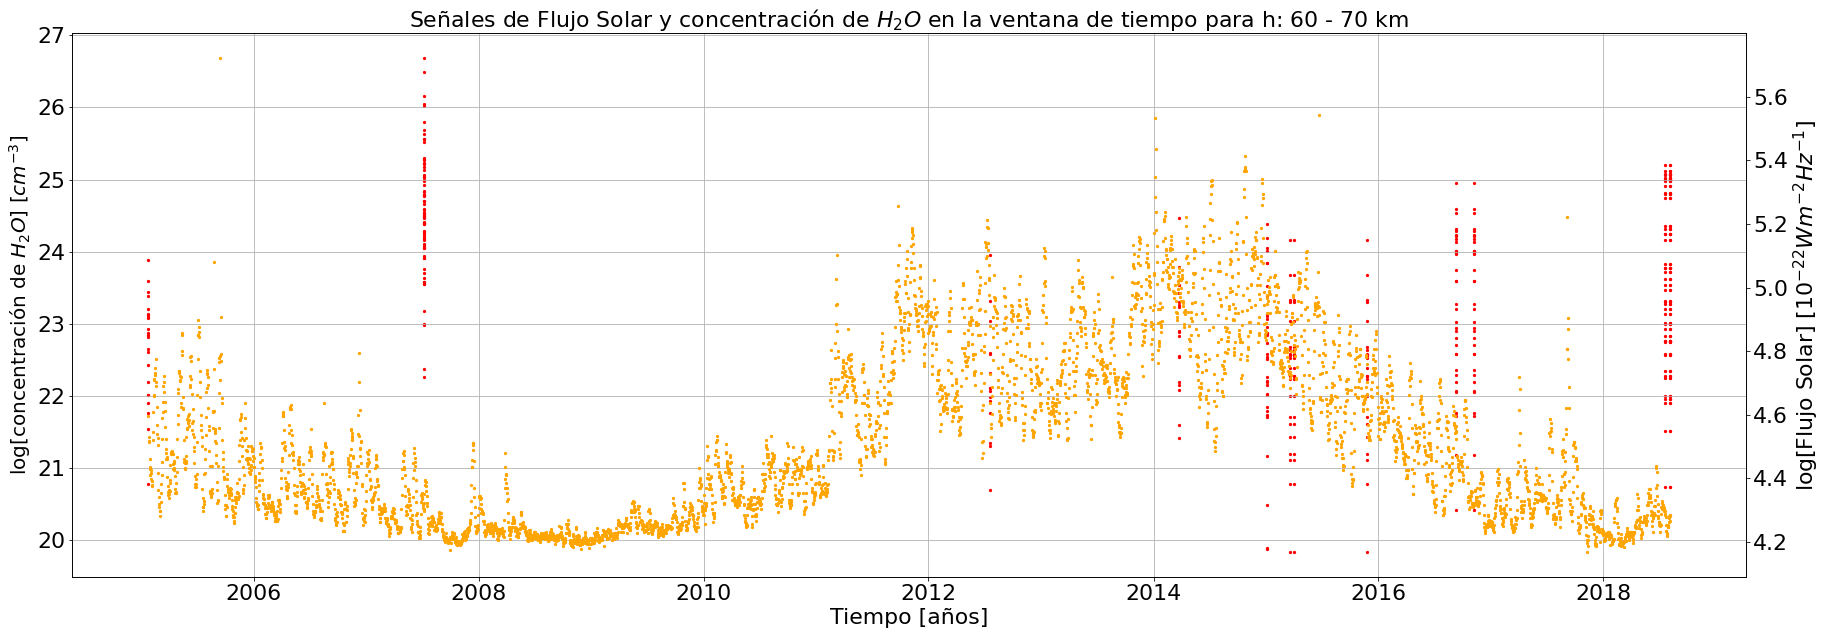

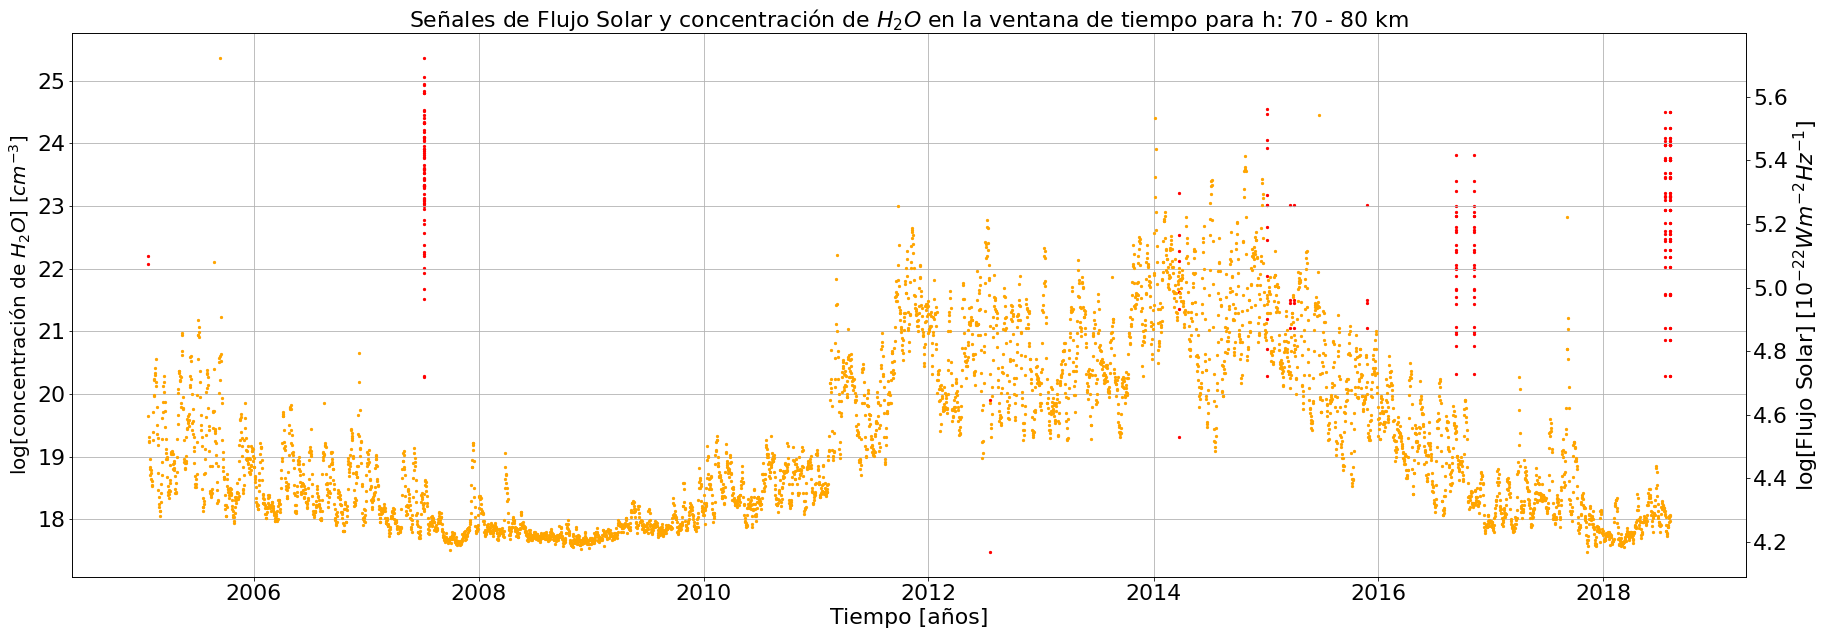

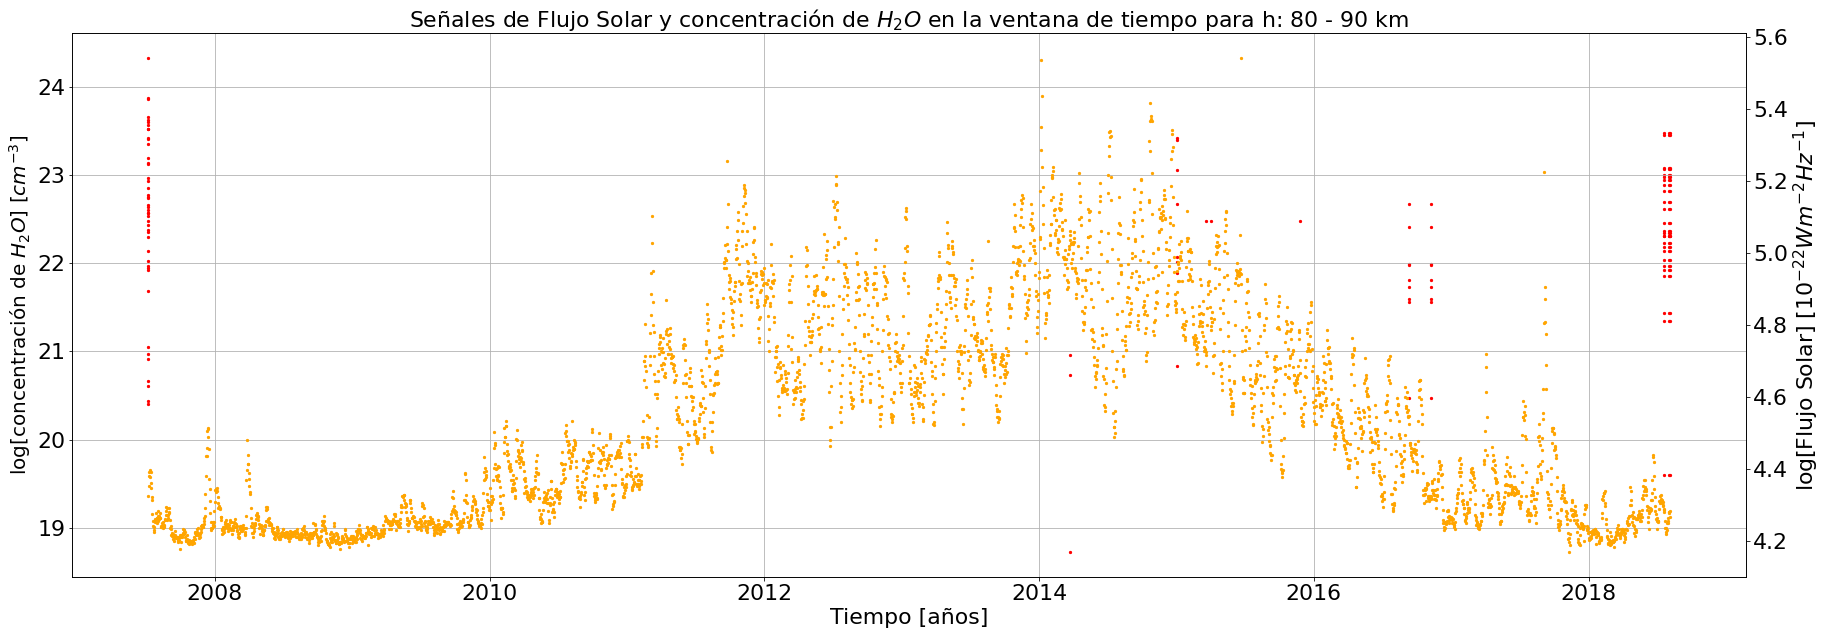

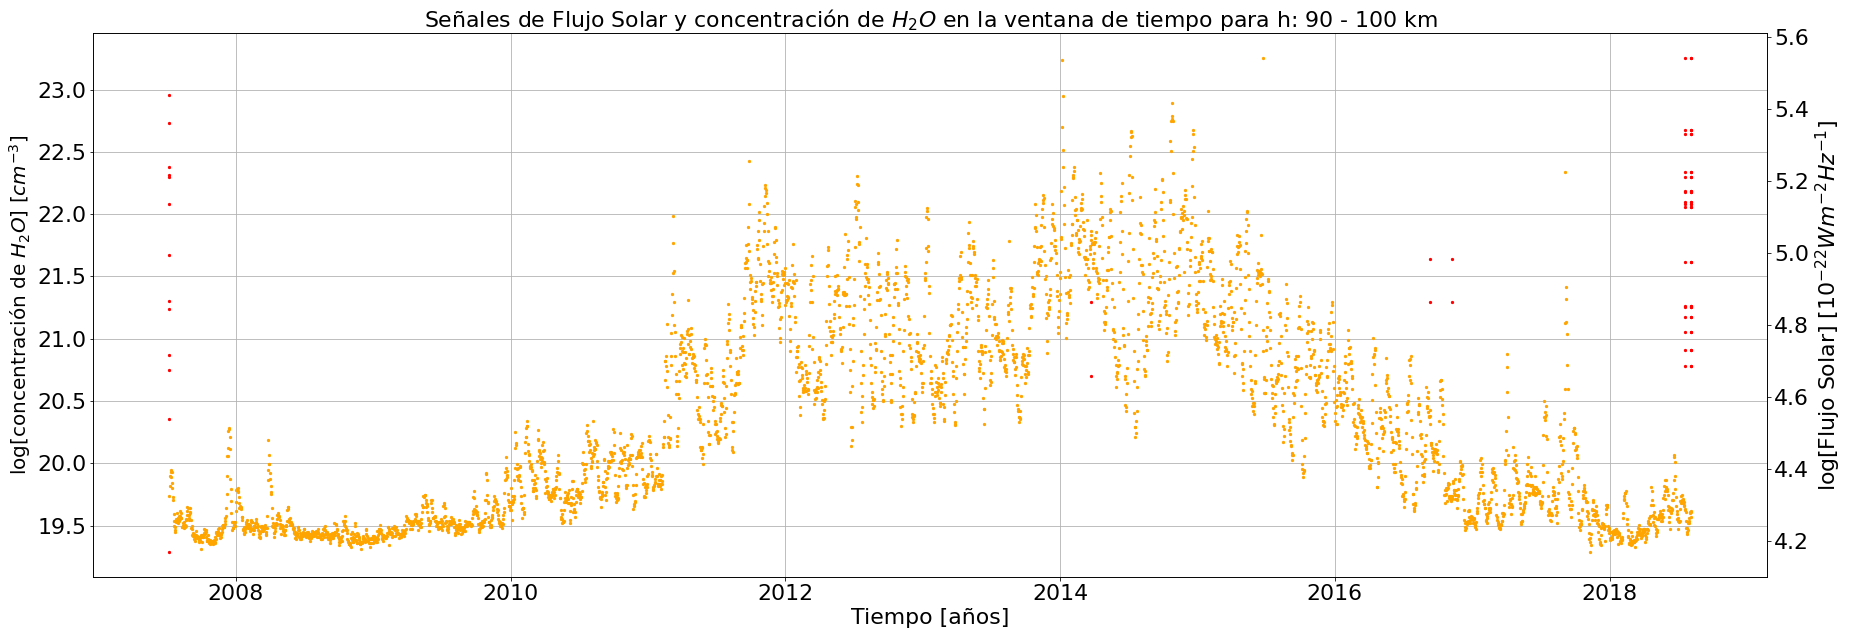

In [28]:
'''Identificación de rango de fechas a analizar, 
filtro de datos buscando misma resolución temporal
para la región escogida arriba'''

date_min_ME, date_max_ME, date_mean_ME = [], [], []

for i in range(len(alturas1)):
  date_mi, date_ma, date_me=np.amin(alturas1[i]['START_DATE_DT']), np.amax(alturas1[i]['START_DATE_DT']), np.mean(alturas1[i]['START_DATE_DT'])
  date_min_ME.append(date_mi)
  date_max_ME.append(date_ma)
  date_mean_ME.append(date_me)


'''Filtro de fechas datos de flujo Solar 
para tener datos dentro de la misma ventana
de tiempo (misma resolución temporal)'''

Sun_data_sub = []

for k in range(len(date_min_ME)):
  date_temp = df_earth_105.loc[(df_earth_105['DATE']>=date_min_ME[k]) & (df_earth_105['DATE']<=date_max_ME[k])]
  Sun_data_sub.append(date_temp)

'''Graficación de las dos señales para
cada rango de altura con la misma
resolución temporal'''

from matplotlib.axis import Tick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

for k in range(len(alturas1)):
    fag, (ax1) = plt.subplots(1,1,figsize=(30,10))
    plt.title(f'Señales de Flujo Solar y concentración de $H_2O$ en la ventana de tiempo para h: {h_ME[k]} - {h_ME[k+1]} km', size=22)
    ax1.scatter(alturas1[k]['START_DATE_DT'],np.log(alturas1[k]['H2O_CONCENTRATION']),5, color='red', label='$H_2O$ density [cm-3]')
    plt.tick_params(axis='both', which='major', labelsize=22)
    ax1.set_ylabel(r'log[Concentracion de $H_2O$] [$cm^{-3}]$ ', size=22)
    ax2=ax1.twinx()
    ax2.scatter(Sun_data_sub[k]['DATE'],np.log(Sun_data_sub[k]['SOLAR_FLUX']), 5,color='orange', label='Solar flux [SFU]')
    ax1.set_xlabel(r'Tiempo [años]', size=22)
    ax1.grid()
    ax1.set_ylabel('log[concentración de $H_2O$] [$cm^{-3}}$]', size=20)
    ax2.set_ylabel('log[Flujo Solar] $[10^{-22}Wm^{-2}Hz^{-1}]$', size=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
      

In [29]:
'''Promedio en intervalos de días
de las observaciones registradas'''

ME_mean = []

Sun_data = []

for er in range(len(alturas1)):
  ME_mean_temp = alturas1[er].groupby('START_DATE_DT').mean()  #Promedio de datos para cada fecha (día)     
  ME_mean.append(ME_mean_temp)
  ME_mean[er]['START_DATE_DT'] = ME_mean[er].index #Cambiar índices por fechas
  Sun_data_temp = Sun_data_sub[er].sample(len(ME_mean[er]))
  Sun_data.append(Sun_data_temp)

#Prueba de que se tiene el mismo número de datos por cada conjunto.
len(Sun_data_sub[7]), len(alturas1[7]), len(Sun_data[0]), len(ME_mean[0])  

(4056, 73, 14, 14)

## Análisis de correlación de señales **LS-Periodograma**

In [30]:
ME_mean[1].head(3)

,ALTITUD,H2O_CONCENTRATION,ERR_H2O_CONCENTRATION,NUMBER_ORBIT,LATITUD_INTERCEPT,LONGITUD_INTERCEPT,SOLAR_LONGITUD,START_DATE_DT
START_DATE_DT,,,,,,,,
2005-01-23,35.036377,2.285524e+11,4.271000e+10,1307.0,68.7,290.6,148.8,2005-01-23
2007-07-08,35.407333,3.941485e+11,8.908572e+10,4505.0,63.1,299.7,272.3,2007-07-08
2008-05-14,34.915500,2.070339e+10,8.909321e+09,5608.0,65.8,287.0,71.9,2008-05-14


In [31]:
#Calibración del error para representar en el periodograma

err_ME = []

for k in range(len(alturas1)):
  err_temp = (ME_mean[k]['ERR_H2O_CONCENTRATION'])/(ME_mean[k]['H2O_CONCENTRATION'])
  err_ME.append(err_temp)

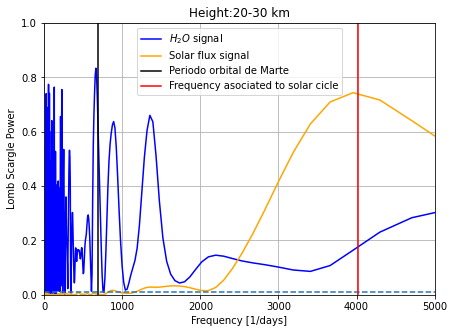

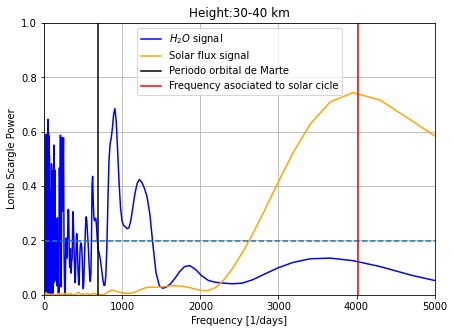

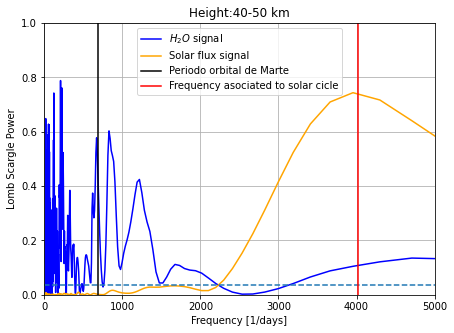

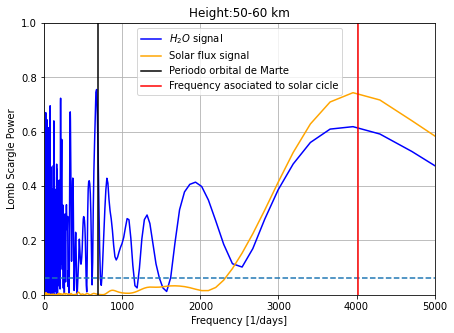

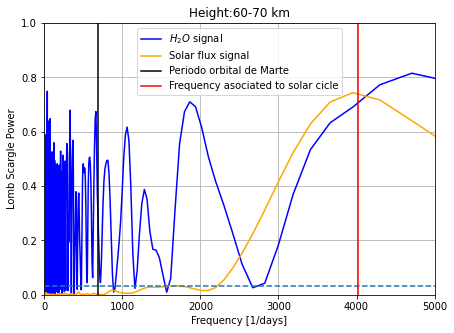

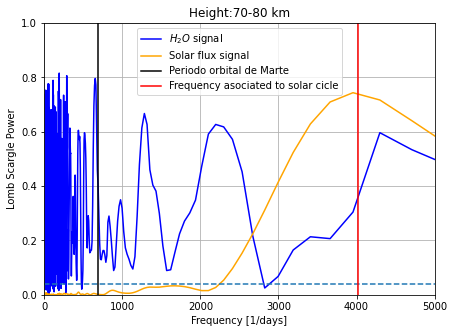

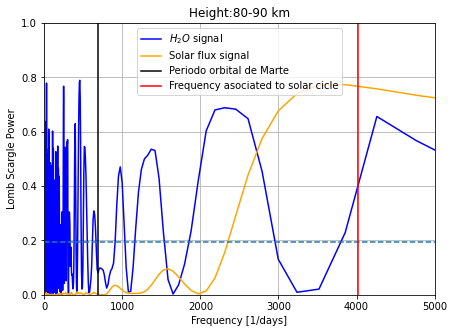

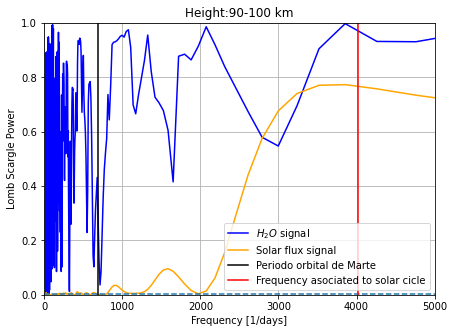

In [32]:
freq_H2O = []
power_H2O = []
freq_Sun = []
power_Sun = []
noise_thre = []

for j in range(len(ME_mean)):
  f_ME, p_ME = LombScargle(Time(ME_mean[j]['START_DATE_DT']), 
                           np.log(ME_mean[j]['H2O_CONCENTRATION']), err_ME[j]).autopower(samples_per_peak=10, maximum_frequency=0.05*(1/u.d)) 
  f_SF, p_SF = LombScargle(Time(Sun_data_sub[j]['DATE']),
                           np.log(Sun_data_sub[j]['SOLAR_FLUX'])).autopower(samples_per_peak=10, maximum_frequency=0.05*(1/u.d))
  freq_H2O.append(f_ME)
  power_H2O.append(p_ME)
  freq_Sun.append(f_SF)
  power_Sun.append(p_SF)

  ''''Umbral de ruido señal Marte''' 
  ls = LombScargle(Time(ME_mean[j]['START_DATE_DT']), np.log(ME_mean[j]['H2O_CONCENTRATION']), err_ME[j])
  ls_false = ls.false_alarm_probability(p_ME.max(), method='baluev') 
  noise_thre.append(ls_false)


#Graficación de los periodogramas

for im in range(len(freq_H2O)):
  plt.figure(figsize=(7,5))
  plt.plot(1/freq_H2O[im], power_H2O[im], color='blue', label='$H_2O$ signal')
  plt.plot(1/freq_Sun[im], power_Sun[im], color='orange', label='Solar flux signal')
  plt.hlines(noise_thre[im], linestyles='dashed', xmin=0, xmax=5000)
  plt.axvline((687), ymin=0, ymax=1, color='black', label='Periodo orbital de Marte')
  plt.axvline((11*365), ymin=0, ymax=1, color='red', label='Frequency asociated to solar cicle')
  plt.xlabel('Frequency [1/days]')
  plt.ylabel('Lomb Scargle Power')
  plt.title(f'Height:{h_ME[im]}-{h_ME[im+1]} km')
  plt.xlim(0,5000)
  plt.ylim(0,1)
  plt.grid()
  plt.legend()

  

In [33]:
len(freq_Sun[0]), len(freq_H2O[0])

(2472, 2472)

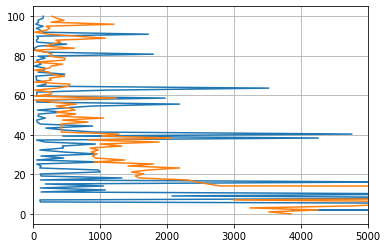

In [34]:
a = 7
number = 100
idx = np.argsort(power_H2O[a])[::-1]
top_frequencies = freq_H2O[a][idx][:number]
top_power = power_H2O[a][idx][:number]
top_0_frequencies = freq_H2O[a][idx][:number]
tt_ = np.linspace(0,number, len(top_0_frequencies))

ids = np.argsort(power_Sun[a])[::-1]
top_frequencies_s = freq_Sun[a][ids][:number]
top_power_s = power_Sun[a][ids][:number]
top_0_frequencies_s = freq_Sun[a][ids][:number]


plt.plot(1/top_0_frequencies, tt_)
plt.plot(1/top_0_frequencies_s, tt_)
plt.xlim(0,5000)
plt.grid()



## Análisis de Correlación cruzada (demo)

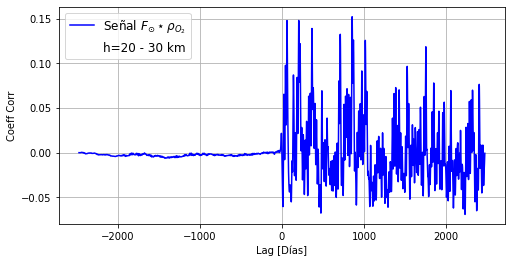

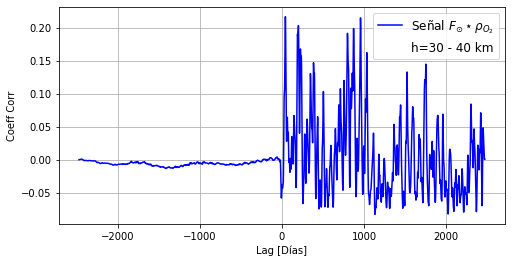

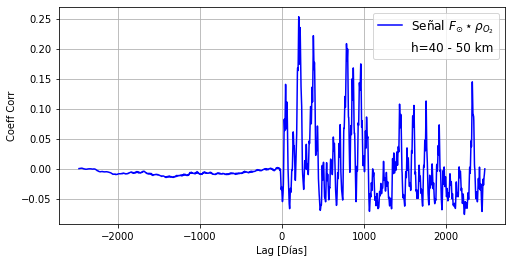

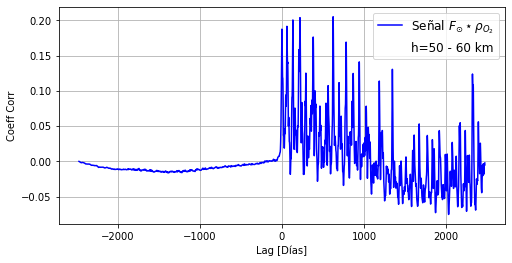

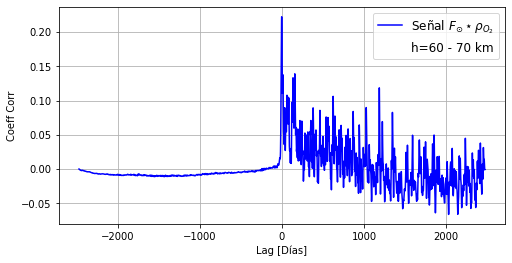

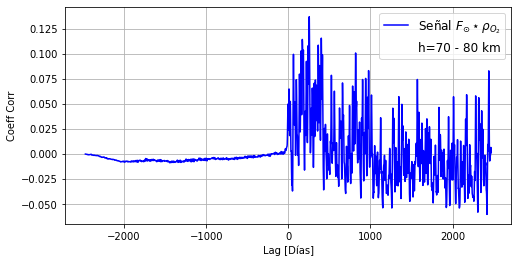

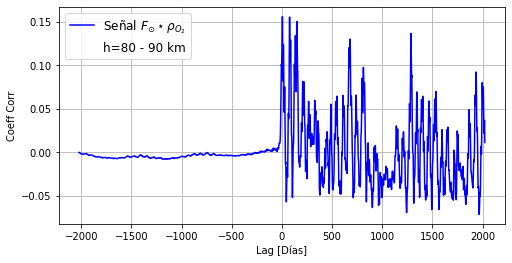

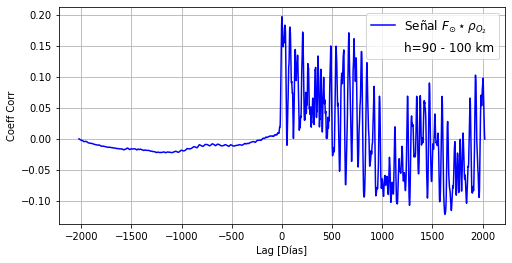

In [35]:
#Análisis de correlación cruzada en series de tiempo 
from scipy import signal 

#Hacer una correlación cruzada, con las respectivas normalizaciones

alturas_corr = []
lags = []



def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c

for d in range(len(ME_mean)):
  lags_temp = signal.correlation_lags(len(1/freq_H2O[d]), len(1/freq_Sun[d]))
  T = ccf_values(power_H2O[d],power_Sun[d])
  alturas_corr.append(T)
  lags.append(lags_temp)

for h in range(len(alturas_corr)):
  plt.figure(figsize=(8,4))
  plt.plot(lags[h], alturas_corr[h], color='blue', label=r'Señal $F_{\odot}\star \rho_{O_2}$')
  plt.scatter(0,0,0, label=f'h={h_ME[h]} - {h_ME[h+1]} km')
  plt.grid()
  plt.xlabel('Lag [Días]')
  plt.ylabel('Coeff Corr')
  plt.legend(markerscale=5, fontsize=12)
  

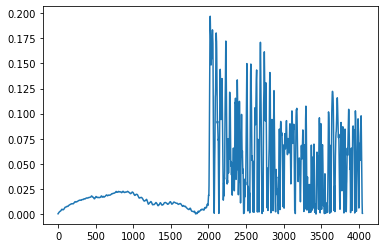

In [36]:
import scipy.stats as stats

def calculate_p_value(observed_correlation, degrees_of_freedom):
    chi_square = -2 * np.log(np.abs(observed_correlation))
    p_value = 1 - stats.chi2.cdf(chi_square, degrees_of_freedom)
    return p_value

retila = calculate_p_value(alturas_corr[7], 2)    

plt.plot(retila)


In [37]:
table = pd.DataFrame()

table['times'] = lags[7]
table['coor_coef'] = alturas_corr[7]

table

,times,coor_coef
0,-2023,-0.000124
1,-2022,-0.000249
2,-2021,-0.000374
3,-2020,-0.000501
4,-2019,-0.000629
...,...,...
4042,2019,0.011471
4043,2020,0.006749
4044,2021,0.003150
4045,2022,0.000444


In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.Series(dftest[0:4], index=['TestStatistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result
    
adf_table = table.drop('times', axis = 1)
adf_table.apply(adf_test, axis = 0)

,coor_coef
TestStatistic,-3.282076
P-value,0.015699
Lags Used,31.000000
No of Observations,4015.000000
Critical Value (1%),-3.431980
Critical Value (5%),-2.862260
Critical Value (10%),-2.567153


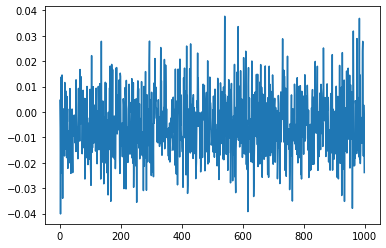

In [39]:
import numpy as np
from scipy.stats import pearsonr

def bootstrapping(data1, data2, num_samples=1000, sample_size=None):
    """
    Calculate the bootstrapped distribution of Pearson's correlation coefficient
    between two signals.
    
    Parameters
    ----------
    data1 : array_like
        The first signal.
    data2 : array_like
        The second signal.
    num_samples : int, optional
        The number of bootstrapped samples to calculate, by default 1000.
    sample_size : int, optional
        The size of each bootstrapped sample, by default None (equal to the size
        of the input signals).
    
    Returns
    -------
    numpy.ndarray
        The bootstrapped distribution of Pearson's correlation coefficients.
    """
    # Calculate the bootstrapped distribution
    if sample_size is None:
        sample_size = len(data1)
    corr_dist = np.zeros(num_samples)
    for i in range(num_samples):
        sample_indices = np.random.randint(0, len(data1), size=sample_size)
        data1_sample = data1[sample_indices]
        data2_sample = data2[sample_indices]
        corr_dist[i] = pearsonr(data1_sample, data2_sample)[0]
        
    return corr_dist

jeje = bootstrapping(power_H2O[0], power_Sun[0], num_samples=1000, sample_size=None)

plt.plot(jeje)

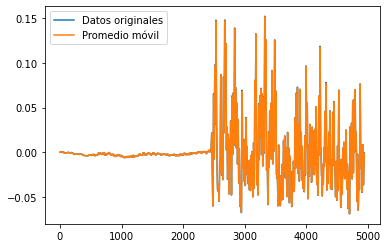

In [40]:
#CODIGO PARA SUAVISAR GRÁFICAS

# Genera una serie de datos de ejemplo
data = pd.DataFrame(alturas_corr[0])

# Calcula el promedio móvil con una ventana de 3 puntos
rolling_mean = data.rolling(window=2).mean()

# Gráfica los datos originales y el promedio móvil
plt.plot(data, label='Datos originales')
plt.plot(rolling_mean, label='Promedio móvil')

# Agrega una leyenda y muestra la gráfica
plt.legend()
plt.show()